# 数据集：Trending YouTube Video Statistics (USvideos.csv)

### 导入所需python包，然后使用pandas读取数据集中的数据，并打印其基本信息

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

dtype = {'video_id':'object', 'trending_date':'object', 'title':'object', 'channel_title':'object', 
         'category_id':'object', 'publish_time':'object', 'tags':'object', 'views':'int', 
         'likes':'int','dislikes':'int', 'comment_count':'int', 'thumbnail_link':'object', 'comments_disabled':'bool',
       'ratings_disabled':'bool','video_error_or_removed':'bool','description':'object'}
data = pd.read_csv('USvideos.csv',dtype=dtype)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
video_id                  40949 non-null object
trending_date             40949 non-null object
title                     40949 non-null object
channel_title             40949 non-null object
category_id               40949 non-null object
publish_time              40949 non-null object
tags                      40949 non-null object
views                     40949 non-null int32
likes                     40949 non-null int32
dislikes                  40949 non-null int32
comment_count             40949 non-null int32
thumbnail_link            40949 non-null object
comments_disabled         40949 non-null bool
ratings_disabled          40949 non-null bool
video_error_or_removed    40949 non-null bool
description               40379 non-null object
dtypes: bool(3), int32(4), object(9)
memory usage: 3.6+ MB


### 打印数据集中前5行数据，观察数据内容

In [2]:
data.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


### 提取数据集中的标称属性，在object类型的属性中，有些属性不是标称属性，如日期、id等，需要把这些属性除去。

In [3]:
data_object = data.select_dtypes(include='object')
#除去非标称属性
data_object = data_object.drop(columns=['trending_date','publish_time'])
data_object.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 7 columns):
video_id          40949 non-null object
title             40949 non-null object
channel_title     40949 non-null object
category_id       40949 non-null object
tags              40949 non-null object
thumbnail_link    40949 non-null object
description       40379 non-null object
dtypes: object(7)
memory usage: 2.2+ MB


### 针对标称属性，打印每个属性值得频数

In [4]:
for i in range(data_object.shape[1]):
    tmp = data_object.iloc[:,i]
    print('属性',tmp.name,'中频数前5的属性值和对应频数为：')
    print(tmp.value_counts().head(5))
    print('\n')

属性 video_id 中频数前5的属性值和对应频数为：
j4KvrAUjn6c    30
NBSAQenU2Bk    29
MAjY8mCTXWk    29
8h--kFui1JA    29
t4pRQ0jn23Q    29
Name: video_id, dtype: int64


属性 title 中频数前5的属性值和对应频数为：
WE MADE OUR MOM CRY...HER DREAM CAME TRUE!                       30
Rooster Teeth Animated Adventures - Millie So Serious            29
YoungBoy Never Broke Again Goes Sneaker Shopping With Complex    29
Charlie Puth - BOY [Official Audio]                              29
Sam Smith - Pray (Official Video) ft. Logic                      29
Name: title, dtype: int64


属性 channel_title 中频数前5的属性值和对应频数为：
ESPN                                      203
The Tonight Show Starring Jimmy Fallon    197
Netflix                                   193
TheEllenShow                              193
Vox                                       193
Name: channel_title, dtype: int64


属性 category_id 中频数前5的属性值和对应频数为：
24    9964
10    6472
26    4146
23    3457
22    3210
Name: category_id, dtype: int64


属性 tags 中频数前5的属性值和对应频数为：
[none]    

### 针对数值属性，获得最大、最小、均值、中位数和四分位数

In [5]:
pd.set_option('display.float_format',lambda x : '%.2f' % x)
print(data.describe())

             views      likes   dislikes  comment_count
count     40949.00   40949.00   40949.00       40949.00
mean    2360784.64   74266.70    3711.40        8446.80
std     7394113.76  228885.34   29029.71       37430.49
min         549.00       0.00       0.00           0.00
25%      242329.00    5424.00     202.00         614.00
50%      681861.00   18091.00     631.00        1856.00
75%     1823157.00   55417.00    1938.00        5755.00
max   225211923.00 5613827.00 1674420.00     1361580.00


### 获得数值属性中缺失值的个数

In [6]:
data_int = data.select_dtypes(include='int')
for i in range(data_int.shape[1]):
    tmp = data_int.iloc[:,i]
    print(tmp.name, '的缺失值个数为：', len(tmp) - tmp.count())

views 的缺失值个数为： 0
likes 的缺失值个数为： 0
dislikes 的缺失值个数为： 0
comment_count 的缺失值个数为： 0


### 绘制属性views的直方图和QQ图，发现其不符合正态分布。

### 绘制盒图，发现位于1.5以上的值较分散，在处理过程中可以考虑删除这些值。

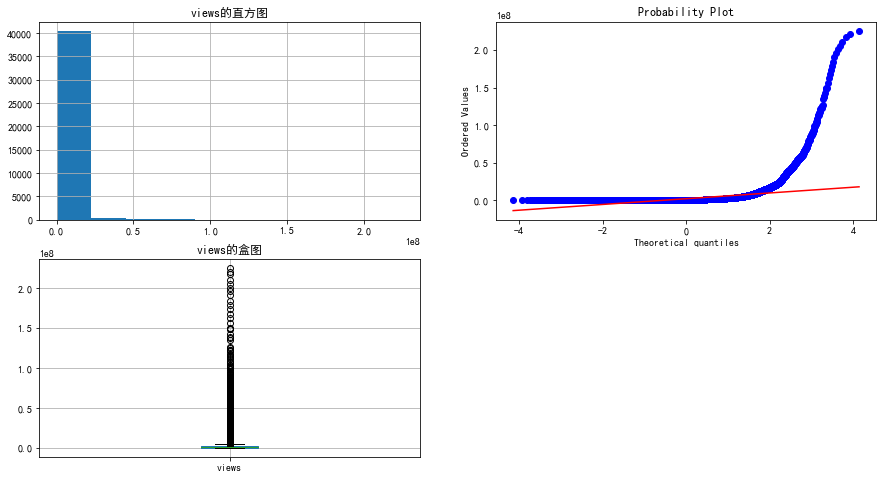

In [7]:
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

fig  = plt.figure(figsize=(15,8))
fig1 = fig.add_subplot(2,2,1)
fig1.set_title('views的直方图')
data['views'].hist(bins=10)

fig2 = fig.add_subplot(2,2,2)
fig2.set_title('views的QQ图')
stats.probplot(data['views'], dist="norm", plot=plt)

fig3 = fig.add_subplot(2,2,3)
fig3.set_title('views的盒图')
pd.DataFrame({'views':data['views']}).boxplot()
plt.show()

### 绘制属性likes的直方图和QQ图，发现其不符合正态分布。

### 绘制盒图，发现位于3000000以上的值较分散，在处理过程中可以考虑删除这些值。

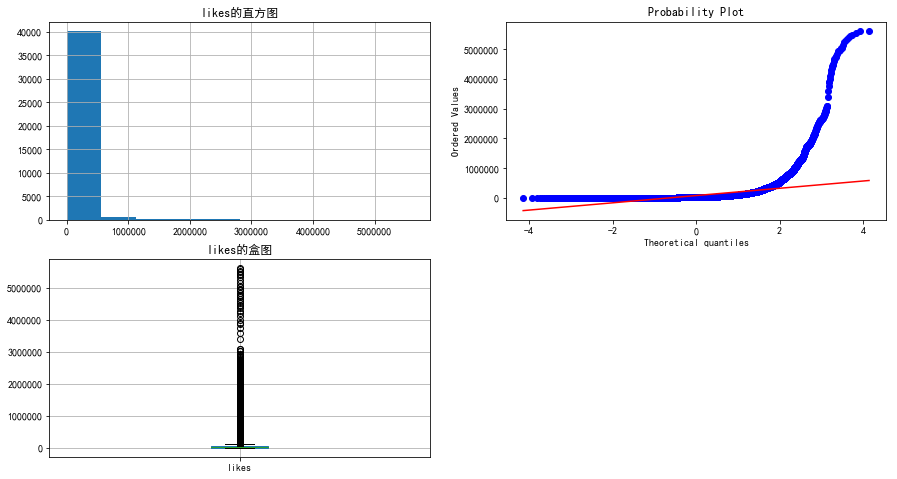

In [8]:
fig  = plt.figure(figsize=(15,8))
fig1 = fig.add_subplot(2,2,1)
fig1.set_title('likes的直方图')
data['likes'].hist(bins=10)

fig2 = fig.add_subplot(2,2,2)
fig2.set_title('likes的QQ图')
stats.probplot(data['likes'], dist="norm", plot=plt)

fig3 = fig.add_subplot(2,2,3)
fig3.set_title('likes的盒图')
pd.DataFrame({'likes':data['likes']}).boxplot()
plt.show()

### 绘制属性dislikes的直方图和QQ图，发现其不符合正态分布。

### 绘制盒图，发现位于500000以上的值较分散，在处理过程中可以考虑删除这些值。

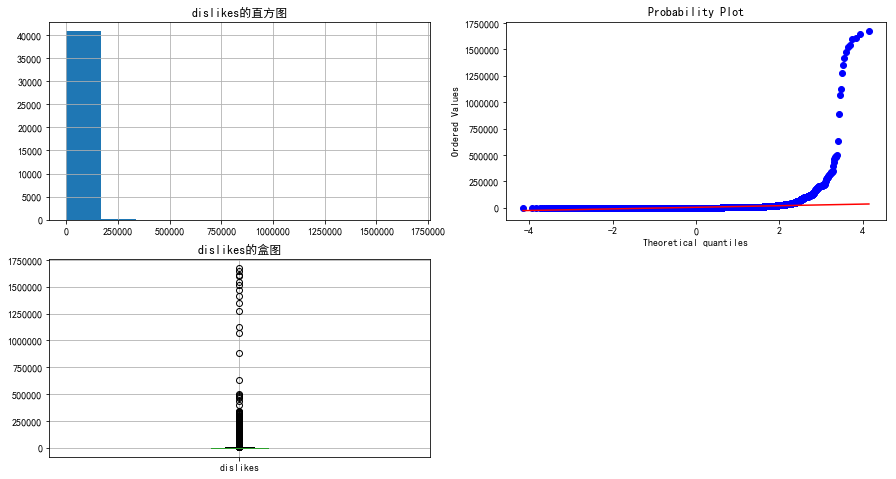

In [9]:
fig  = plt.figure(figsize=(15,8))
fig1 = fig.add_subplot(2,2,1)
fig1.set_title('dislikes的直方图')
data['dislikes'].hist(bins=10)

fig2 = fig.add_subplot(2,2,2)
fig2.set_title('dislikes的QQ图')
stats.probplot(data['dislikes'], dist="norm", plot=plt)

fig3 = fig.add_subplot(2,2,3)
fig3.set_title('dislikes的盒图')
pd.DataFrame({'dislikes':data['dislikes']}).boxplot()
plt.show()

### 绘制属性comment_count的直方图和QQ图，发现其不符合正态分布。

### 绘制盒图，发现位于600000-1100000以及1300000-1400000 之间的值较分散，在处理过程中可以考虑删除这些值。

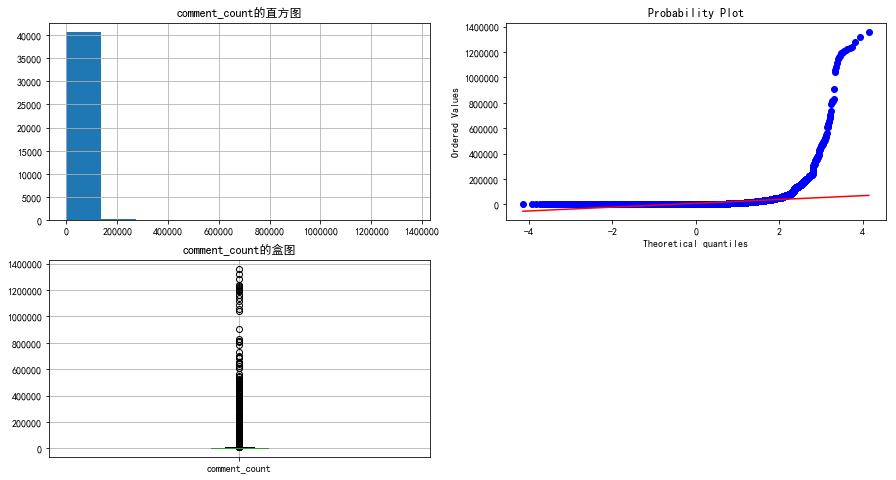

In [10]:
fig  = plt.figure(figsize=(15,8))
fig1 = fig.add_subplot(2,2,1)
fig1.set_title('comment_count的直方图')
data['comment_count'].hist(bins=10)

fig2 = fig.add_subplot(2,2,2)
fig2.set_title('comment_count的QQ图')
stats.probplot(data['comment_count'], dist="norm", plot=plt)

fig3 = fig.add_subplot(2,2,3)
fig3.set_title('comment_count的盒图')
pd.DataFrame({'comment_count':data['comment_count']}).boxplot()
plt.show()

### 获得所有数值属性的盒图

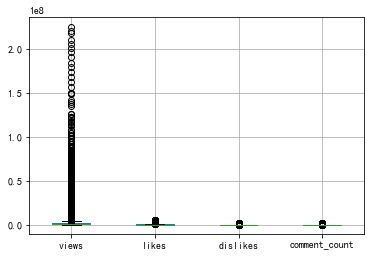

In [11]:
data_int.boxplot()

## 在数值属性中不存在缺失值，因此没有对缺失值进行处理，在数据集Wine Reviews中存在这一部分